<H1> THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS </H1>

<H2> Task 2: Prediction using Unsupervised ML </H2>

**AIM:** From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. <br>
**LANGUAGE USED:** Python 3 <br>
**IDE:** Jupyter Notebook <br>
**TYPE:** K-Means Clustering <br>
**AUTHOR:** Nishchith Rao P R <br>

**Importing the libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**Importing the dataset**

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape #Displays the dimensions of the dataset

(150, 4)

In [4]:
iris_df.describe() #Displays the numerical insights on the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.isnull().sum() #Checking for null values in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**To find the optimum number of clusters for K Means**

In [9]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Plotting th graph and identify the number of clusters using elbow method**

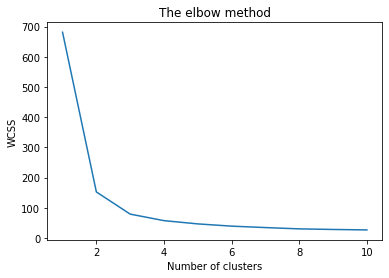

In [10]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Therefore, from the above graph we choose the optimal number of clusters to be **3.**

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**Visualize the clusters**

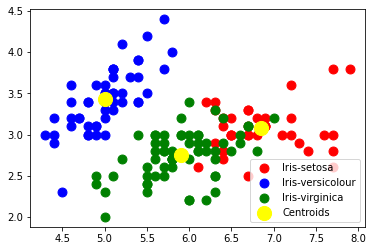

In [12]:
# Visualising the clusters on the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')

plt.legend()

<h3> Make Predictions </h3>

In [13]:
#Defining the input and target variables

X = iris.data[:,:2]     #Contains sepal length and Sepal Width
y = iris.target         #Contains target species value

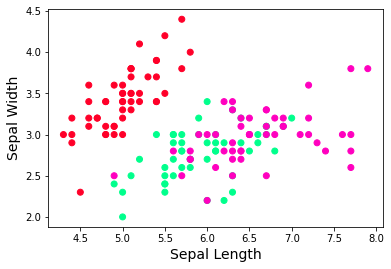

In [14]:
# Visualizing X and Y variables in graphical form

plt.scatter(X[:,0],X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.show()

<h3>Evaluate the Model: Comparing Actual vs Predicted data values</h3>

In [17]:
#This will tell us which cluster the data observation belongs to

new_labels = kmeans.labels_
new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

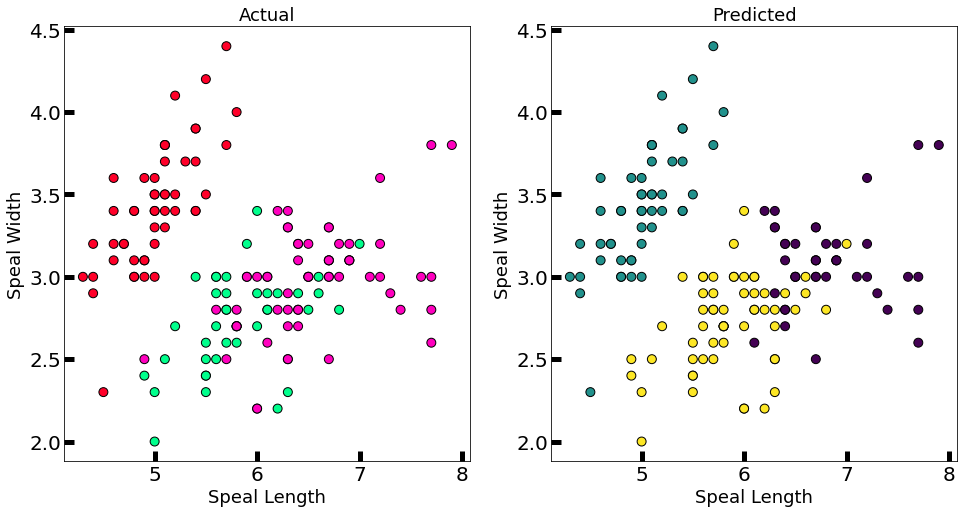

In [18]:
#Plotting the identified clusters and comparing with the results

fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(X[:,0],X[:,1], c=y, cmap='gist_rainbow', edgecolor = 'k',s=80)
axes[1].scatter(X[:,0],X[:,1], c=new_labels, cmap='viridis', edgecolor = 'k',s=80)


axes[0].set_xlabel('Speal Length',fontsize=18)
axes[0].set_ylabel('Speal Width',fontsize=18)

axes[1].set_xlabel('Speal Length',fontsize=18)
axes[1].set_ylabel('Speal Width',fontsize=18)

axes[0].tick_params(direction='in',length=10,width=5,colors='k',labelsize=20)
axes[1].tick_params(direction='in',length=10,width=5,colors='k',labelsize=20)

axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

plt.show()
